## Matplotlib

---

In [1]:
# import the libraries

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


### Styles

---

#### Lines

In [2]:
line_styles = ['-.', '--', '-', ':', 'None', '-.',]

marker_styles = [

'1', # tri_down
'2', # tri_up
'3', # tri_left
'4', # tri_right
'8', # octagon
'.', # point
',', # pixel
'^', # triangle up
'<', # triangle_left
'>', # triangle_right
'*', # star
'+', # plus
'|', # vline
'd', # thin_diamond
'D', # diamond
'h', # hexagon1
'H', # hexagon2
'o', # circle
'p', # pentagon
's', # square
'v', # triangle down
'x', # x

]

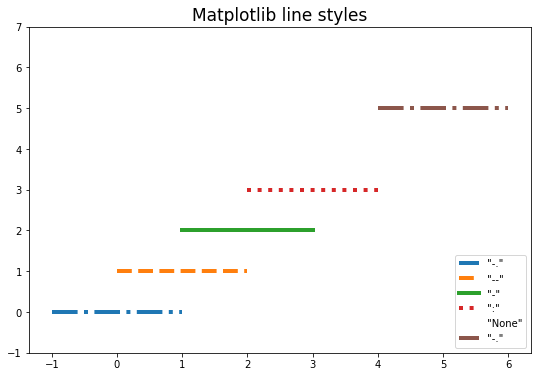

In [3]:
plt.figure(figsize=(9, 6))
samples = range(len(line_styles))

for i in samples:
    plt.plot([i-1, i, i+1], [i, i, i], 
             label = '"%s"' %line_styles[i], 
             linestyle = line_styles[i],
             lw=4
             ) 

# Annotation    
    
plt.title('Matplotlib line styles', fontsize=17)
plt.ylim([-1, len(line_styles)+1])
plt.legend(loc='lower right')

plt.show()

---

Markers


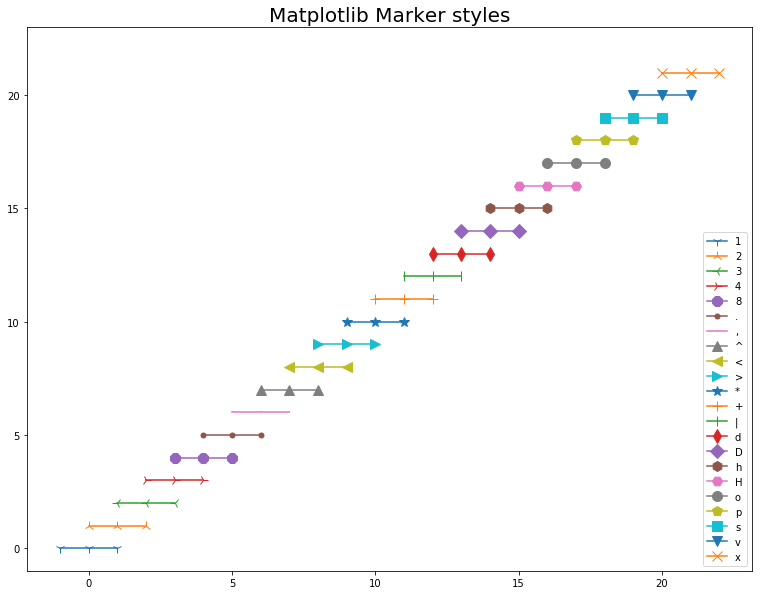

In [4]:
plt.figure(figsize=(13, 10))
samples = range(len(marker_styles))

for i in samples:
    plt.plot([i-1, i, i+1], [i, i, i], label=marker_styles[i], 
             marker=marker_styles[i], markersize=10) 

# Annotation    
plt.title('Matplotlib Marker styles', fontsize=20)
plt.ylim([-1, len(marker_styles)+1])
plt.legend(loc='lower right')

plt.show()

---

#### ColorMaps

In [5]:
# Colormap
colormap = [plt.cm.Oranges, plt.cm.inferno, plt.cm.autumn, plt.cm.rainbow,
           plt.cm.gist_earth, plt.cm.YlGnBu]

In [6]:
def colormaps(colormap):
    fig, (ax0, ax1) = plt.subplots(1,2, figsize=(14, 7))
    samples = range(1,16)
    
    # Default Color Cycle
    for i in samples:
        ax0.plot([0, 10], [0, i], label=i, lw=3) 
        
    plt.gca().set_color_cycle([colormap(i) for i in np.linspace(0, 0.9, len(samples))])
    
    for i in samples:
        ax1.plot([0, 10], [0, i], label=i, lw=3) 
        
    # Annotation
    ax0.set_title('Default color cycle')
    ax1.set_title('plt.cm.Paired colormap')
    ax0.legend(loc='upper left')
    ax1.legend(loc='upper left')
    
    plt.show()

E:\Python\Anaconda\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
  if __name__ == '__main__':


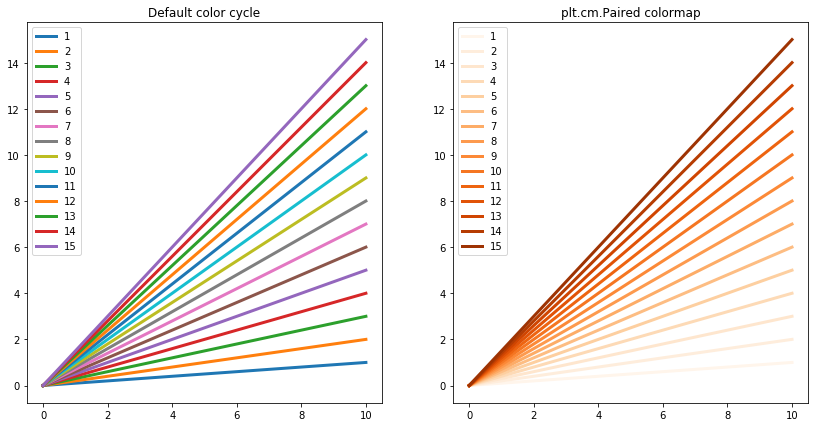

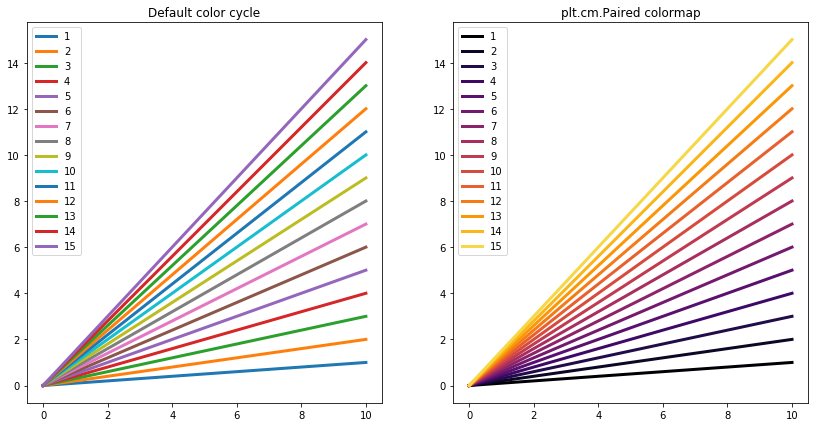

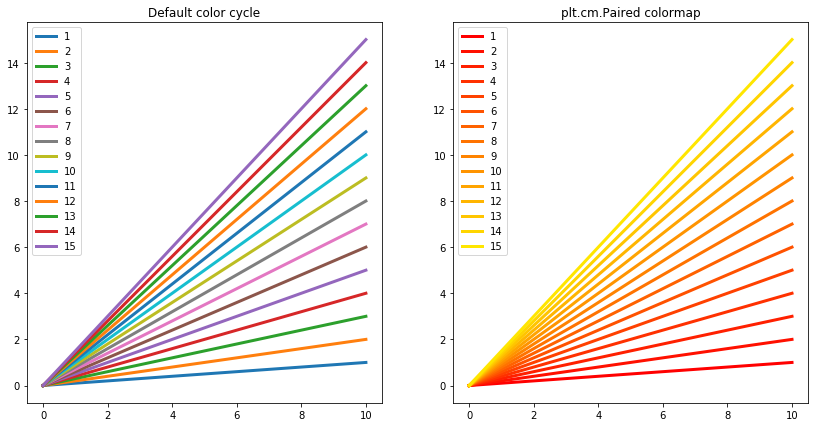

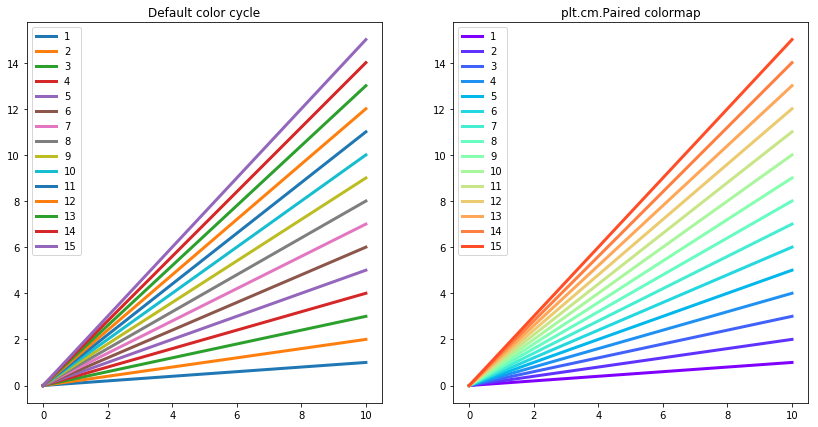

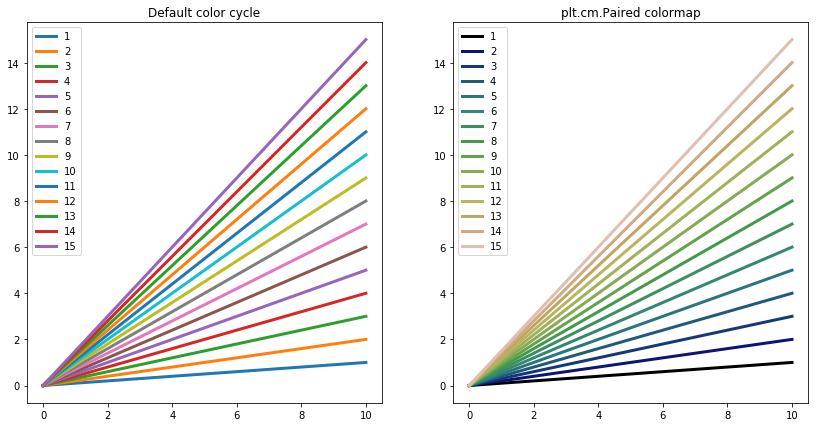

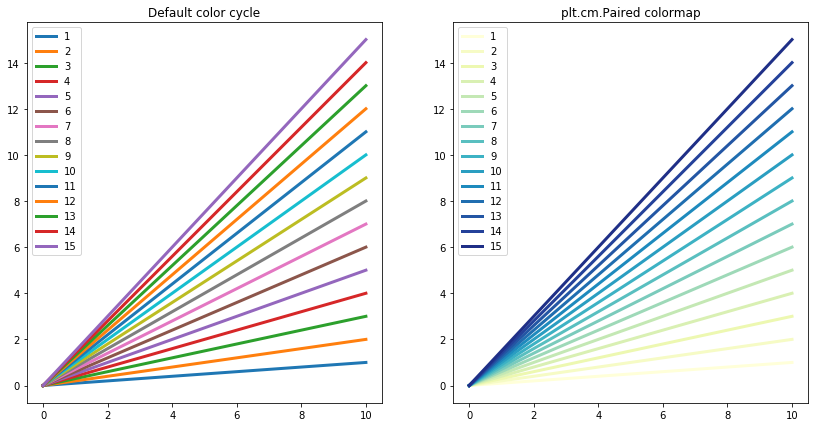

In [7]:
for cm in colormap:
    colormaps(cm)

---

### Basics

---

In [8]:
plt.figure(facecolor=None, edgecolor=None, clear=False, num=1)


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [9]:
plt.figure(figsize=(13,11), facecolor='red', edgecolor='green', clear=True)


<Figure size 936x792 with 0 Axes>

<Figure size 936x792 with 0 Axes>

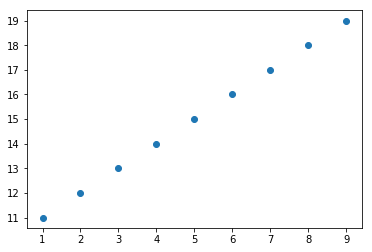

In [10]:
plt.scatter(np.arange(1,10), np.arange(11,20))


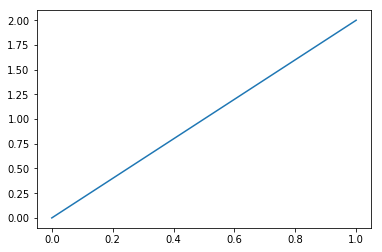

In [11]:
plt.plot([0, 1], [0, 2])

---

### Saving figures

---

In [12]:
# functions

def gini(p):
    return (p)*(1 - (p)) + (1-p)*(1 - (1-p))

def entropy(p):
    return - p*np.log2(p) - (1 - p)*np.log2((1 - p))

def error(p):
    return 1 - np.max([p, 1 - p])

In [13]:
x = np.arange(0.0, 1.0, 0.01)

ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]


##### The tight_layout() function often helps to produce a "tighter" appearence of the plot, it is not sufficient if to fit our graph nicely into the figure boundaries if we plot outside it's margins. This issue can be easily resolved by setting the bbox_inches attribute to 'tight' inside savefig.

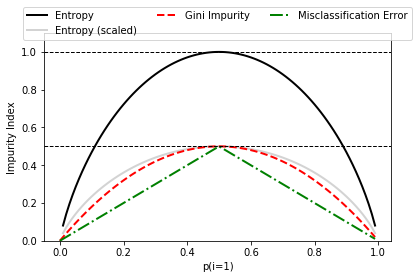

In [14]:
fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err], 
                  ['Entropy', 'Entropy (scaled)', 
                    'Gini Impurity', 'Misclassification Error'],
                  ['-', '-', '--', '-.'],
                  ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)



ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=3, fancybox=True, shadow=False)

ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.tight_layout()

# to save the image

plt.savefig('./impurity.png', dpi=300, bbox_inches='tight')


---

### Line plots
---

In [15]:
x = [1, 22, 32, 43, 66]

y1 = [31, 150, 160, 170, 345]
y2 = [11, 120, 130, 140, 342]


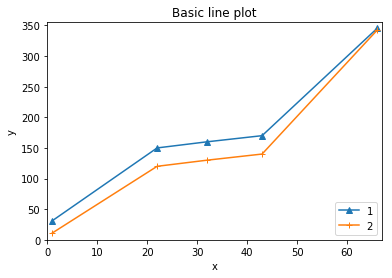

In [16]:
plt.plot(x, y1, marker='^')
plt.plot(x, y2, marker='+')

plt.xlabel('x')
plt.ylabel('y')

plt.xlim([0, max(x)+1])
plt.ylim([0, max(y1+y2) + 10])

plt.title('Basic line plot')
plt.legend(['1', '2'], loc='lower right')
plt.show()



### Line plot with error bars

---

In [17]:
x = [1, 2, 3, 4]

y1 = [10, 20, 30, 40]
y2 = [25, 50, 75, 100]

y1_err = [1, 2, 3, 4]
y2_err = [2.5, 5, 7.5, 10]

x_labels = ['x'+str(y) for y in range(1,len(x)+1)]
x_labels

['x1', 'x2', 'x3', 'x4']

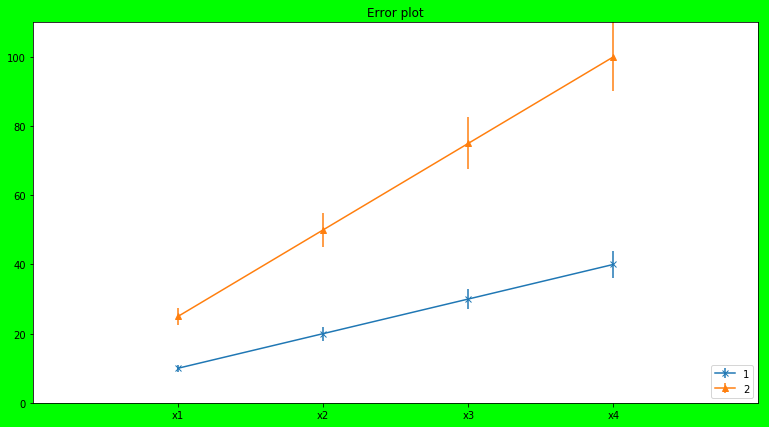

In [18]:
plt.figure(figsize=(13,7), facecolor='lime', edgecolor='black', clear=True)

plt.errorbar(x, y1, yerr=y1_err, fmt='-x')
plt.errorbar(x, y2, yerr=y2_err, fmt='-^')

plt.xticks(x, x_labels)

plt.xlim([0, max(x)+1])
plt.ylim([0, max(y1+y2) + 10])

plt.title('Error plot')
plt.legend(['1', '2'], loc='lower right')

plt.show()

### Log scale

---

In [19]:
x = [1, 2, 3]

y1 = [0.5,9.0,60.0]
y2 = [0.3,6.0,30.0]

x_labels = ['x1', 'x2', 'x3']


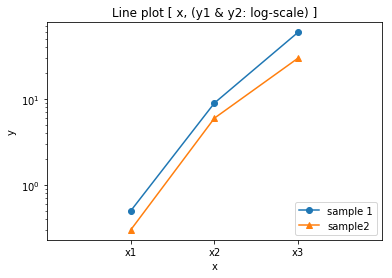

In [20]:
plt.plot(x, y1, marker='o')
plt.plot(x, y2, marker='^')

plt.xticks(x, x_labels)
plt.xlim([0,4])
plt.xlabel('x')
plt.ylabel('y')
plt.yscale('log')
plt.title('Line plot [ x, (y1 & y2: log-scale) ]')
plt.legend(['sample 1', 'sample2'], loc='lower right')

plt.show()

### Stepper plots

---

In [21]:
A = np.arange(1, 11)
B = np.random.randn(10) # 10 rand. values from a std. norm. distr.


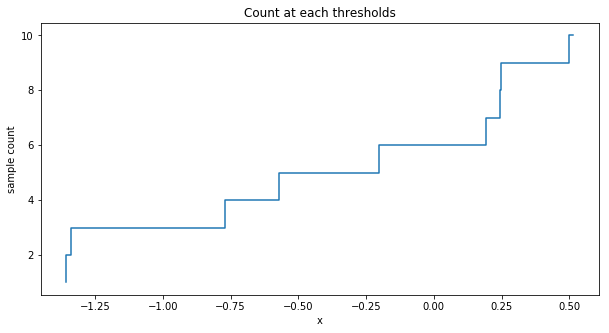

In [22]:
plt.figure(figsize=(10,5))

plt.step(np.sort(B), A) 
plt.ylabel('sample count')
plt.xlabel('x')
plt.title('Count at each thresholds')

plt.show()

### Gaussian probability density functions

---

In [23]:
import math

In [24]:
def pdf(x, mu=0, sigma=1):
    """
    Calculates the normal distribution's probability density 
    function (PDF).  
    
    t1 = 1/sq.rt(2pi*sigma)
    t2 = e^(-0.5 * ((x-mu)/sigma)**2)
    
    mu - pop mean
    sigma - pop sd
    x - sample mean
        
    """
    term1 = 1.0 / ( math.sqrt(2*np.pi) * sigma )
    term2 = np.exp( -0.5 * ( (x-mu)/sigma )**2 )
    return term1 * term2

In [25]:
x = np.arange(0, 100, 0.05)

pdf1 = pdf(x, mu=5, sigma=2.5**0.5)
pdf2 = pdf(x, mu=10, sigma=6**0.5)

x, pdf1, pdf2

(array([0.000e+00, 5.000e-02, 1.000e-01, ..., 9.985e+01, 9.990e+01,
        9.995e+01]),
 array([0.00170007, 0.00187793, 0.00207233, ..., 0.        , 0.        ,
        0.        ]),
 array([3.91483767e-005, 4.25416653e-005, 4.62098182e-005, ...,
        1.09498315e-293, 5.17772484e-294, 2.44731313e-294]))

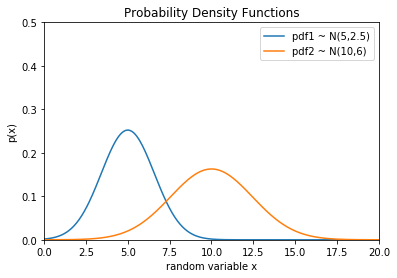

In [26]:
# plot, title, labels, legend, limits, show

# plot
plt.plot(x, pdf1)
plt.plot(x, pdf2)

# title
plt.title('Probability Density Functions')

# labels
plt.ylabel('p(x)')
plt.xlabel('random variable x')

# legend
plt.legend(['pdf1 ~ N(5,2.5)', 'pdf2 ~ N(10,6)'], loc='upper right')

# x, y limits
plt.ylim([0,0.5])
plt.xlim([0,20])

# show
plt.show()

### Cumulative sums

---

In [27]:
A = np.arange(1, 11)
B = np.random.randn(10) # 10 rand. values from a std. norm. distr.
C = B.cumsum()

A, B, C

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([-0.77509434,  0.51151171, -1.04460128, -2.32501803, -0.45091057,
        -1.68673852, -1.45796379, -1.68909099, -0.5374788 , -1.64220725]),
 array([ -0.77509434,  -0.26358263,  -1.30818391,  -3.63320194,
         -4.08411251,  -5.77085103,  -7.22881482,  -8.91790581,
         -9.45538461, -11.09759186]))

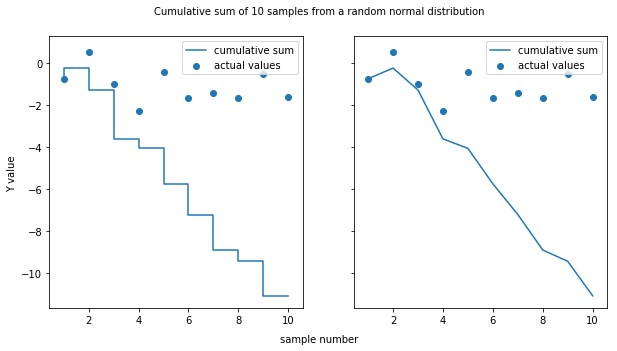

In [28]:
fig, (ax0, ax1) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(10,5))

## A) via plt.step()
ax0.step(A, C, label='cumulative sum') # cumulative sum via numpy.cumsum()

ax0.scatter(A, B, label='actual values')

ax0.set_ylabel('Y value')

ax0.legend(loc='upper right')


## B) via plt.plot()
ax1.plot(A, C, label='cumulative sum') # cumulative sum via numpy.cumsum()

ax1.scatter(A, B, label='actual values')

ax1.legend(loc='upper right')

# fig text!
fig.text(0.5, 0.04, 'sample number', ha='center', va='center')
fig.text(0.5, 0.95, 'Cumulative sum of 10 samples from a random normal distribution', ha='center', va='center')

plt.show()

### References:

1. https://sebastianraschka.com/

2. 